In [ ]:
# 퍼셉트론은 임계치를 0으로 만들어놓고, 가중치와 입력값을 곱한 후 편향을 더하여 총합이 0이면 미출력, 1이면 출력.
# b + w1x1+ w2x2 <= 0 print(0)
# b + w1x1 + w2x2 > 0 print(1)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
a = tf.random.uniform([2,3],0,1)
a

2022-11-07 20:37:55.589835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.23719144, 0.9645399 , 0.63536   ],
       [0.79839826, 0.95722973, 0.8423562 ]], dtype=float32)>

In [4]:
# 딥러닝 데이터를 텐서(tensor) 자료구조로 표현, 신경망의 가중치도 텐서
# 다차원배열을 --> 텐서라고 부름.
# mnist 원소 하나 28 * 28 2차원 텐서
# mnist -- 60,000 * 28 * 28 3차원 텐서
# 동영상 --> 4차원 텐서
# 인간의 한계로 인해서 5차원 텐서까지만 사용

In [5]:
# 텐서가 제공하는 데이터셋의 텐서 구조를 확인

In [6]:
import tensorflow.keras.datasets as ds #텐서플로우 데이터셋

In [7]:
# 텐서는 튜플 형태로 받아오고, sklearn은 x,x,y,y로 받아옴.
(x_train,y_train),(x_test,y_test) = ds.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [9]:
# y_train을 one-hot으로 변경
# one-hot-encoding 범주형 카테고리 값들을 해당 인덱스 값만 1로 두고 나머지는 0으로 표시.

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train_sk = ohe.fit_transform(y_train.reshape(-1,1)) # sklearn(2차원 배열을 원함.): toarray -> astype(int)

y_train_tf = tf.one_hot(y_train,10) # 텐서플로우 형태

import pandas as pd
y_train_pd = pd.get_dummies(y_train) # pd 형태

In [10]:
# 그러니까 sklearn의 one hot encoder를 그대로 쓰려면 fit_transform()해서 y_train데이터를 넣고, reshape을 해야하는거고
# 텐서플로우 형태로 one_hot을 보여줄 때는 tf.one_hot()에 y_train넣고 row값 넣고.
# pd형태로 정규화 할때는 pd.get_dummies 모듈

In [11]:
# <각 모델별 one-hot-encoding>
# sklearn: from sklearn.preprocessing import OneHotEncoder한 후
#        한 객체 = OneHotEncoder()
#        한 객체.fit_transform(y_train)
# tensorflow: tf.one_hot(y_train)
# pd: pd.get_dummies(y_train)

In [12]:
y_train_sk.toarray().astype('int8') # sklearn 계열

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int8)

In [13]:
y_train_tf

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [14]:
y_train_pd

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [15]:
# And 데이터는 두 값이 모두 같아야만 1출력
# NAnd 데이터는 두 값이 달라야만 1출력
# or 데이터는 입력 데이터 값 하나라도 1이면 1출력
# 

In [16]:
# OR 데이터
x = [
    [0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]
]
y = [
    [-1],[1],[1],[1]
]

In [17]:
# 신경망 기초 그림 4-10 (b)의 구조를 텐서로 구현
# 퍼셉트론의 가중치와 bias를 초기화
# 텐서는 넘파이와 완벽하게 호환... 데이터를 구성할 때 variable 대신에 numpy array를 사용해도 무관

w = tf.Variable([[1.0],[1.0]])
b = tf.Variable(-0.5)

# w = np.array([[1.0],[1.0]])
# b = np.array(-0.5)


# tf.add : 덧셈을 수행합니다.
# tf.subtract : 뺄셈을 수행합니다.
# tf.muliply : 곱셈을 수행합니다.
# tf.truediv : 나눗셈의 몫을 구합니다.
# tf.mod : 나눗셈의 나머지를 구합니다.
# tf.abs : 절대값을 구합니다.

#### tf.negative 음수를 반환합니다.
#### tf.sign 부호를 반환합니다.(음수: -1,양수: 1,0)
#### tf.square 제곱을 수행합니다.
#### tf.sqrt 제곱근을 반환합니다.
#### tf.pow 거듭제곱을 수행합니다.
#### tf.maximum 더 큰 값을 반환합니다.
#### tf.minimum 더 작은 값을 반환합니다.
#### tf.exp 지수 값을 계산합니다.
#### tf.log 로그 값을 계산합니다.

# 퍼셉트론 동작

In [18]:
s = tf.add(tf.matmul(x,w),b) #matmul은 행렬, tf.add는 덧셈
o = tf.sign(s) # tf.sign은 부호를 출력

In [20]:
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-1.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)>

# 퍼셉트론 학습
### 데이터는 위에 만든 x,y를 사용

In [16]:
# 가중치 초기화: 가중치 소실을 방지하기 위하여.
# tf.random.uniform은 랜덤 난수 지정. [2,1]은 텐서 형태, -0.5가 최솟값, 0.5가 최댓값
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5)) 
b = tf.Variable(tf.zeros([1]))

In [17]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.07519758],
       [-0.02988708]], dtype=float32)>

In [18]:
# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [19]:
# 전방계산식: 전방계산이라는건 머신러닝 할때 predict하는 것처럼, 퍼셉트론 계산식에 의해서 forward에 의해 얻은 결과..
def forward():
    s = tf.add(tf.matmul(x,w),b)
    o = tf.tanh(s) # tanh 활성화 함수
    return o

In [20]:
# 손실 함수(오차 계산): mse(평균 제곱 오차)
def loss():
    o = forward()
    return tf.reduce_mean((y-o)**2)

In [21]:
# 500 세대까지 학습(100세 마다 정보를 출력)
for i in range(500):
    opt.minimize(loss,var_list=[w,b])
    if (i%100 == 0): print(f"loss at epoch : {i} = {loss().numpy()}")

loss at epoch : 0 = 0.7276857495307922
loss at epoch : 100 = 0.09117960184812546
loss at epoch : 200 = 0.042181529104709625
loss at epoch : 300 = 0.026542022824287415
loss at epoch : 400 = 0.01912447065114975


In [22]:
# 학습된 데이터를 OR 데이터로 예측
o = forward()
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.8163237 ],
       [ 0.8863593 ],
       [ 0.88637924],
       [ 0.9992663 ]], dtype=float32)>

# 케라스를 이용한 퍼셉트론 학습

#### 데이터는 or 데이터를 사용하고
#### 신경망 구조를 설계
#### 신경망으로 학습
#### 예측

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [24]:
# x,y가 지정이 되어지지 않았을 경우를 대비하여,,,
# x = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
# y = [[-1], [1], [1], [1]]
x,y

([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], [[-1], [1], [1], [1]])

In [25]:
# 신경망 구조 설계
n_input = 2
n_output = 1
perceptron = Sequential() # 시퀀스 객체 
perceptron.add(Dense(n_output,activation='tanh',input_shape=(n_input,) # 층을 쌓음. n_output 출력층(단층 퍼셉트론이기 때문에 1),input_shape는 입력층
                    ,kernel_initializer='random_uniform'))             # kernel_intializer은 최초 커널의 값

In [26]:
# 신경망 학습 compile, fit
perceptron.compile(loss='mse',optimizer= SGD(learning_rate=0.1), metrics=['mse']) # 위에서 learning_rate를 설정해주었기 때문.
perceptron.fit(x,y,epochs=500,verbose=2) #verbose는 출력 표시 값인데, 0은 출력 안함, 1은 자세히, 2는 함축적 정보.

Epoch 1/500
1/1 - 0s - loss: 1.0562 - mse: 1.0562 - 260ms/epoch - 260ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7815 - mse: 0.7815 - 4ms/epoch - 4ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6590 - mse: 0.6590 - 3ms/epoch - 3ms/step
Epoch 4/500
1/1 - 0s - loss: 0.6004 - mse: 0.6004 - 3ms/epoch - 3ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5659 - mse: 0.5659 - 4ms/epoch - 4ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5416 - mse: 0.5416 - 3ms/epoch - 3ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5222 - mse: 0.5222 - 3ms/epoch - 3ms/step
Epoch 8/500
1/1 - 0s - loss: 0.5056 - mse: 0.5056 - 3ms/epoch - 3ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4904 - mse: 0.4904 - 3ms/epoch - 3ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4764 - mse: 0.4764 - 3ms/epoch - 3ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4630 - mse: 0.4630 - 3ms/epoch - 3ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4503 - mse: 0.4503 - 3ms/epoch - 3ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4380 - mse: 0.4380 - 3ms/epoch - 3ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4262 - mse:

In [27]:
predict = perceptron.predict(x)
predict

1/1 [==============================] - 0s 80ms/step


array([[-0.81606317],
       [ 0.88620853],
       [ 0.8862153 ],
       [ 0.99926305]], dtype=float32)

In [28]:
# 텐서를 이용한 학습
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.8163237 ],
       [ 0.8863593 ],
       [ 0.88637924],
       [ 0.9992663 ]], dtype=float32)>

In [29]:
# 다층 퍼셉트론으로 MNIST 인식

In [30]:
#### 다층 퍼셉트론(신경망 Dense가 2개이상) 으로 MNIST 인식
#### 단일 퍼셉트론(신경망 Dense 한개)

In [31]:
# 신경망 설계, 학습, 예측.

In [32]:
# mnist에서 읽어와서 신경망 입력할 형태로 변환
import numpy as np
(x_train,y_train),(x_test,y_test) = ds.mnist.load_data()

# 텐서 모양을 2차원 텐서
x_train.shape # (60000,28,28)
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
# 표준화 - narray 변경
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# loss 함수의 선택 여부에 따라서 one-hot -- cat.....
# 변경하지 않음.. spare...

In [33]:
# 신경망 구조 설계 밀집층 2개 구조
# 파이퍼 파라미네터...
# input, hidden, output은 고정.
n_input = 28*28
n_hidden = 1023
n_output = 10

# multi-layer perceptron
mlp = Sequential()
mlp.add(Dense(n_hidden, activation='relu', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.add(Dense(n_output,activation='softmax'))
mlp.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [35]:
 hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 5s - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.0646 - val_accuracy: 0.9825 - 5s/epoch - 11ms/step
Epoch 2/30
469/469 - 5s - loss: 0.0135 - accuracy: 0.9963 - val_loss: 0.0606 - val_accuracy: 0.9815 - 5s/epoch - 10ms/step
Epoch 3/30
469/469 - 5s - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0676 - val_accuracy: 0.9814 - 5s/epoch - 10ms/step
Epoch 4/30
469/469 - 6s - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0767 - val_accuracy: 0.9788 - 6s/epoch - 12ms/step
Epoch 5/30
469/469 - 5s - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0636 - val_accuracy: 0.9823 - 5s/epoch - 10ms/step
Epoch 6/30
469/469 - 5s - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0670 - val_accuracy: 0.9825 - 5s/epoch - 10ms/step
Epoch 7/30
469/469 - 6s - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0757 - val_accuracy: 0.9804 - 6s/epoch - 12ms/step
Epoch 8/30
469/469 - 5s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0703 - val_accuracy: 0.9832 - 5s/epoch - 10ms/step
Epoch 9/30
469/4

In [36]:
# 학습곡선 시각화
import matplotlib.pyplot as plt

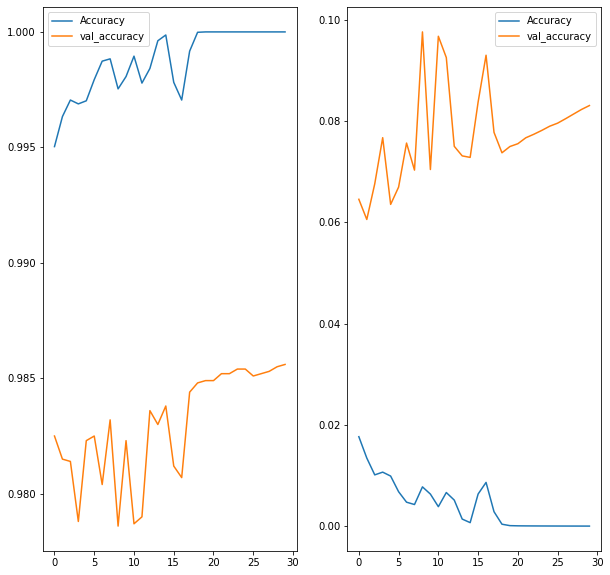

In [39]:
# 정확률
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label='Accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.legend()

#손실률
ax2.plot(hist.history['loss'],label='Accuracy')
ax2.plot(hist.history['val_loss'],label = 'val_accuracy')
ax2.legend()
plt.show()

In [40]:
mlp.evaluate(x_train,y_train), mlp.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9856


([1.0884170478675514e-05, 1.0], [0.08307873457670212, 0.9855999946594238])

# fashion mnist로 확장을 해서 신경망 구성하고 학습하고 학습곡선

In [44]:
(x_train,y_train),(x_test,y_test) = ds.fashion_mnist.load_data()

In [45]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [46]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [47]:
# 텐서 모양을 2차원 텐서
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
# 표준화 - narray 변경
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [48]:
n_input = 28*28
n_hidden = 1023
n_output = 10

# multi-layer perceptron
mlp = Sequential()
mlp.add(Dense(n_hidden, activation='relu', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.add(Dense(n_output,activation='softmax'))
mlp.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [49]:
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 5s - loss: 0.4939 - accuracy: 0.8251 - val_loss: 0.4082 - val_accuracy: 0.8532 - 5s/epoch - 11ms/step
Epoch 2/30
469/469 - 4s - loss: 0.3659 - accuracy: 0.8686 - val_loss: 0.4139 - val_accuracy: 0.8480 - 4s/epoch - 10ms/step
Epoch 3/30
469/469 - 4s - loss: 0.3253 - accuracy: 0.8807 - val_loss: 0.4335 - val_accuracy: 0.8398 - 4s/epoch - 9ms/step
Epoch 4/30
469/469 - 4s - loss: 0.3009 - accuracy: 0.8886 - val_loss: 0.3488 - val_accuracy: 0.8719 - 4s/epoch - 9ms/step
Epoch 5/30
469/469 - 5s - loss: 0.2805 - accuracy: 0.8958 - val_loss: 0.3452 - val_accuracy: 0.8774 - 5s/epoch - 10ms/step
Epoch 6/30
469/469 - 4s - loss: 0.2647 - accuracy: 0.9023 - val_loss: 0.3488 - val_accuracy: 0.8705 - 4s/epoch - 10ms/step
Epoch 7/30
469/469 - 5s - loss: 0.2525 - accuracy: 0.9060 - val_loss: 0.3289 - val_accuracy: 0.8824 - 5s/epoch - 10ms/step
Epoch 8/30
469/469 - 5s - loss: 0.2394 - accuracy: 0.9111 - val_loss: 0.3224 - val_accuracy: 0.8868 - 5s/epoch - 11ms/step
Epoch 9/30
469/469

In [1]:
# 정확률
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label='Accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.legend()

#손실률
ax2.plot(hist.history['loss'],label='Accuracy')
ax2.plot(hist.history['val_loss'],label = 'val_accuracy')
ax2.legend()
plt.show()

NameError: name 'plt' is not defined

In [5]:
# L층   은닉층 L-1 양 끝단을 입력과 출력
# L이 5개다 하면 은닉층은 4개... 당연! 
# 이미지 특징: 화소수 ex) 28*28은 784 출력 = 10개. 
# 모든 은닉층의 뉴런의 개수가 500개라고 하면
# 입력층과 은닉층 한개를 (784+1) * 500 --> 가중치
# 은닉층과 출력층을 연결하는 가중치는 (500+1) * 10
#  1,149,010 총 가중치!
# 계산은 GPU, 과적합은 규제를 해야함.
# 계산은 GPU, 과적합은 규제 알고리즘을 적용
# 전방계산 -> 오차계산 -> 가중치를 업데이트(전방계산의 반대 방향): 오류역전파

In [ ]:
# 층이 5개인 신경망을 구성 -- 위에서 만든 mlp를 이용해서 dense 늘려서 구현
256 - 128 - 64 32 16 8 4 2 1

In [6]:
# 신경망 구조
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

In [ ]:
mlp = Sequential()
mlp.add(Dense(n_hidden1, activation='tanh', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.add(Dense(n_hidden2, activation='tanh', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.add(Dense(n_hidden3, activation='tanh', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.add(Dense(n_hidden4, activation='tanh', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.add(Dense(n_output, activation='tanh', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.compile(Dense(n_hidden, activation='tanh', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))

NameError: name 'hist' is not defined

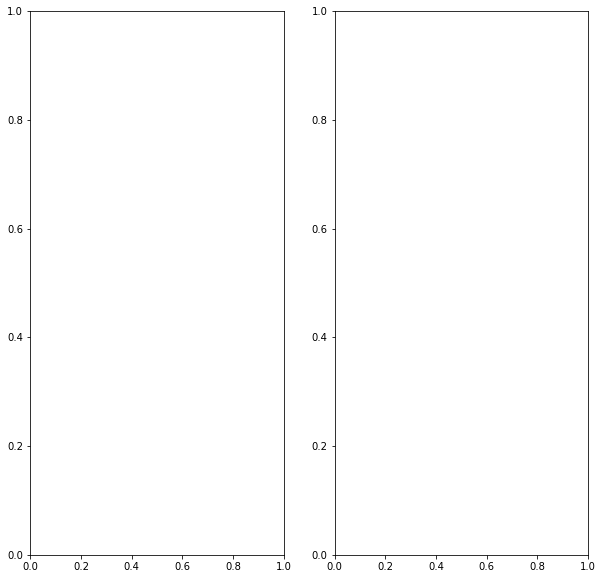

In [7]:
# 학습곡선 시각화 - epoch를 늘리면 추가 개선사항이 있는지와 과적합 여부 및 최적의 epoch 수를 찾기
import matplotlib.pyplot as plt
# 정확률
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label='Accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.legend()

#손실률
ax2.plot(hist.history['loss'],label='Accuracy')
ax2.plot(hist.history['val_loss'],label = 'val_accuracy')
ax2.legend()
plt.show()

In [9]:
# 동일 조건에서는 깊은 다층 퍼셉트론이 우수한 성능을 보인다.
# glorot_uniform --> Glorot2010 논문 -> 텐서플로계열에서 이걸 알고리즘으로 구현해서 제공
# glorot_uniform 방식이 random_uniform으로 생성한 가중치 초기화 값보다 성능이 우수.... 앞으로는 생략해서 사용

In [10]:
# 그래디언트 소멸 문제
# 깊이가 10이고 모든 층의 그레이디언트가 0.01라고 하면 층을 지날 때마다 0.01 * 0.01 * 0.01 == 0.00000...1
# 층이 깊어질 수록 가중치 갱신이 일어나지 않거나... 학습이 매우느려짐.
# 해결.. 병렬로 gpu를 사용 코렙.. 병렬.. TPU를 제공.

In [11]:
# 식 5.3 에서 s에 활성함수 T를 적용할 때... T가 시그모이드면 s의 값이 클 때 그레이디언트는 아주 작다...

In [12]:
# 대략 s가 5보다 크면.. 0에 가깝고
# tanh 시그모이드 s = 8 이면 그레이디언트는 0.0000000 ~~
# 그레이디언트 소멸문제를 해결.. ReLu 함수 s가 양수일 때.. 1이고 음수일 때는 0  -> 소멸가능성이 낮고.. -> 활성화 함수에서 Relu를 사용